In [725]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [727]:
df1 = pd.read_csv('../data/Time.csv')
# Check out the first few rows
df1.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [729]:
df2 = pd.read_csv('../data/SearchTrend.csv')
# Check out the first few rows
df2.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [731]:
df=pd.merge(df1,df2,how='inner',on='date')

In [733]:
df.shape

(162, 11)

<Figure size 1000x1600 with 0 Axes>

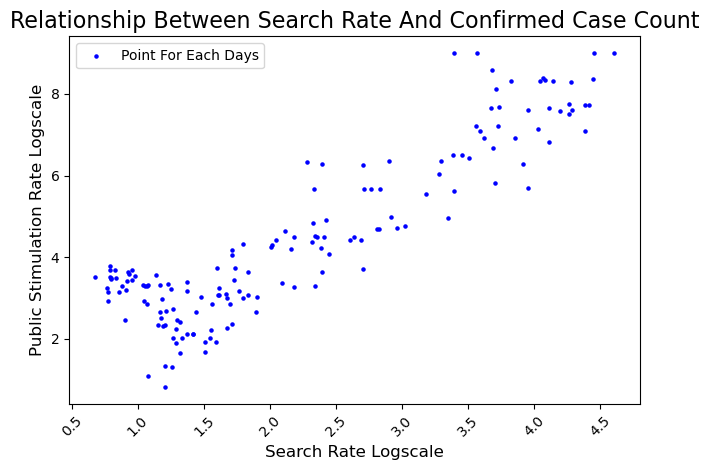

In [735]:
#df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10, 16))

data1 = df['confirmed']

prv_conf = data1.shift(1)
df.loc[:, 'pub_stim'] = (data1 - prv_conf + 1) / data1
data2 = df['pub_stim']

prv_pbstm = data2.shift(1)

df = df.dropna(subset=['pub_stim']).copy()

df['coronavirus_log'] = np.log(df['coronavirus']).round(5)

df['pub_stim_log'] = np.log(df['pub_stim']).round(5)+9

df.plot.scatter(x='coronavirus_log', y='pub_stim_log', label='Point For Each Days', color='blue', marker='.')
plt.title("Relationship Between Search Rate And Confirmed Case Count", fontsize=16)
plt.xlabel("Search Rate Logscale", fontsize=12)
plt.ylabel("Public Stimulation Rate Logscale", fontsize=12)
plt.xticks(rotation=45) 
plt.legend()
plt.grid(False)

plt.tight_layout() 
plt.show()


In [737]:
del_col = ['date', 'coronavirus', 'pub_stim']
df = df.drop(columns=del_col)

In [739]:
X = df.drop(columns=['coronavirus_log'])
y = df['pub_stim_log'].astype(np.float64)
print(X.shape)
print(y.shape)

(161, 10)
(161,)


In [741]:
from sklearn.model_selection import train_test_split

In [743]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [745]:
print(f'X train shape: {X_train.shape}; y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}; y test shape: {y_test.shape}')

X train shape: (128, 10); y train shape: (128,)
X test shape: (33, 10); y test shape: (33,)


In [747]:
data_num = df.drop(columns=['pub_stim_log'])
data_num.head()

,time,test,negative,confirmed,released,deceased,cold,flu,pneumonia,coronavirus_log
1,16,1,0,1,0,0,0.22462,0.59789,4.31987,3.56481
2,16,4,3,1,0,0,0.23808,0.56661,3.66416,3.39265
3,16,22,21,1,0,0,0.30308,0.55625,3.18035,4.60517
4,16,27,25,2,0,0,0.34689,0.40226,2.48156,4.45569
5,16,27,25,2,0,0,0.70888,0.39744,3.40926,4.14073


In [749]:
from sklearn.preprocessing import StandardScaler
norm_e = StandardScaler()
norm_e.fit_transform(data_num,).mean(axis=0)

array([ 4.41330892e-17,  0.00000000e+00,  8.82661784e-17,  1.32399268e-16,
       -8.82661784e-17, -8.82661784e-17,  0.00000000e+00, -8.82661784e-17,
        1.32399268e-16,  8.82661784e-17])

In [751]:
print('mean:',norm_e.fit_transform(data_num,).mean(axis=0))
print('std:',norm_e.fit_transform(data_num,).std(axis=0))

mean: [ 4.41330892e-17  0.00000000e+00  8.82661784e-17  1.32399268e-16
 -8.82661784e-17 -8.82661784e-17  0.00000000e+00 -8.82661784e-17
  1.32399268e-16  8.82661784e-17]
std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [753]:
df.replace({'coronavirus_log':0}, np.nan, inplace=True)
df.replace({'pub_stim_log':0}, np.nan, inplace=True)

In [755]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,
                        strategy='mean', 
                        copy=True)
imputed = imputer.fit_transform(df[['coronavirus_log','pub_stim_log']])

In [757]:
print(imputed[df[df['coronavirus_log'].isna()].index])

[]


In [759]:
df.columns

Index(['time', 'test', 'negative', 'confirmed', 'released', 'deceased', 'cold',
       'flu', 'pneumonia', 'coronavirus_log', 'pub_stim_log'],
      dtype='object')

In [761]:
# Perform the train-test split
y = df['pub_stim_log']
X = df.drop('pub_stim_log', axis =1, inplace=False)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20)
print(X_train.shape)

(128, 10)


In [763]:
num_var = ['test', 'negative', 'confirmed', 'released', 'deceased', 'cold', 'flu', 'pneumonia', 'coronavirus_log', 'time']
X_train_num = X_train[num_var]
X_test_num = X_test[num_var]

In [765]:
# Numerical feature standardization

# Impute the data
X_train_imp = imputer.fit_transform(X_train_num)
X_test_imp = imputer.transform(X_test_num)

# Check for missing values
np.isnan(X_train_imp).any(), np.isnan(X_test_imp).any()

# normalize
X_train_norm = norm_e.fit_transform(X_train_imp)
X_test_norm = norm_e.transform(X_test_imp)

X_train_norm.shape, X_test_norm.shape

((128, 10), (33, 10))

In [767]:
X_train

,time,test,negative,confirmed,released,deceased,cold,flu,pneumonia,coronavirus_log
62,0,331780,308343,8897,2909,104,0.94142,0.07108,0.20372,2.41084
144,0,1081487,1045240,12003,10669,277,0.09181,0.03045,0.11681,0.92704
140,0,1018214,982026,11814,10563,273,0.11090,0.04099,0.12881,1.05406
77,0,466804,437225,10284,6598,186,0.20717,0.05763,0.14026,2.38957
139,0,1012769,974512,11776,10552,273,0.09663,0.03254,0.08417,0.95303
...,...,...,...,...,...,...,...,...,...,...
59,0,307024,282555,8565,1947,91,0.47171,0.10754,1.10896,2.91807
49,0,196618,171778,7382,166,51,0.45435,0.09263,0.23962,3.39425
46,0,164740,136624,6284,108,42,0.58625,0.09163,0.28071,3.38833
152,0,1170901,1137058,12373,10856,280,0.11763,0.02590,0.09154,0.78847


In [769]:
from sklearn.linear_model import LinearRegression

In [771]:
model = LinearRegression()

In [773]:
print(df.dtypes)

time                 int64
test                 int64
negative             int64
confirmed            int64
released             int64
deceased             int64
cold               float64
flu                float64
pneumonia          float64
coronavirus_log    float64
pub_stim_log       float64
dtype: object


In [775]:
model.fit(X_train, y_train)

LinearRegression()

In [777]:
print(f'Training R^2: {model.score(X_train, y_train)}')

Training R^2: 0.9527369099861958


In [779]:
print(f'Test R^2: {model.score(X_test, y_test)}')

Test R^2: 0.949449965111676


In [781]:
X_train = pd.DataFrame(X_train)
X_train.columns = ['test', 'negative', 'confirmed', 'released', 'deceased', 'cold', 'flu', 'pneumonia', 'coronavirus_log', 'time']

X_test = pd.DataFrame(X_test)
X_test.columns = ['test', 'negative', 'confirmed', 'released', 'deceased', 'cold', 'flu', 'pneumonia', 'coronavirus_log', 'time']

y_train = pd.DataFrame(y_train)
y_train.columns = ['pub_stim_log']

y_test = pd.DataFrame(y_test)
y_test.columns = ['pub_stim_log']

X_train.to_csv('../data/Covid_X_train.csv')
X_test.to_csv('../data/Covid_X_test.csv')
y_train.to_csv('../data/Covid_y_train.csv')
y_test.to_csv('../data/Covid_y_test.csv')

In [783]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [785]:
X_train.to_csv('../data/Covid_X_train.csv')
X_test.to_csv('../data/Covid_X_test.csv')
y_train.to_csv('../data/Covid_y_train.csv')
y_test.to_csv('../data/Covid_y_test.csv')

In [787]:
X_train.columns

Index(['test', 'negative', 'confirmed', 'released', 'deceased', 'cold', 'flu',
       'pneumonia', 'coronavirus_log', 'time'],
      dtype='object')

In [789]:
y_train.columns

Index(['pub_stim_log'], dtype='object')

In [791]:
?MLPClassifier

Init signature:
MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden laye

In [793]:
regr = MLPRegressor(random_state=1, max_iter=1000, solver = 'lbfgs')
regr.fit(X_train, y_train.values.ravel())
regr.predict(X_test[:1])

array([4.21823114])

In [795]:
from sklearn.model_selection import cross_val_score 

model = MLPRegressor(max_iter = 800) 
model.fit(X_train, y_train.values.ravel())

MLPRegressor(max_iter=800)

In [797]:
cross_val_r2 = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring='r2')
print(f"Average recall score on cross-validation: {np.mean(cross_val_r2)}")

Average recall score on cross-validation: -33963144.13182922


In [799]:
pred_train = regr.predict(X_train)
pred_test = regr.predict(X_test)

In [801]:
regr.score(X_train, y_train, sample_weight=None)

-8.072757990357756

In [803]:
regr.score(X_test, y_test, sample_weight=None)

-10.97886055076155